In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import random
import time
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
accident=pd.read_csv('US_Accidents_Dec20_updated.csv')
accident.head()
print(accident.columns)
data= pd.DataFrame(accident)
print(data)
print(data.head)
print(accident.shape)

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,9,11,12,13,14,15,16,17,18,19,20,26,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
                ID  Severity     Start_Time        End_Time  Start_Lat  \
0        A-2716600       3.0  2/8/2016 0:37   2/8/2016 6:37   40.10891   
1        A-2716601       2.0  2/8/2016 5:56  2/8/2016 11:56   39.86542   
2        A-2716602       2.0

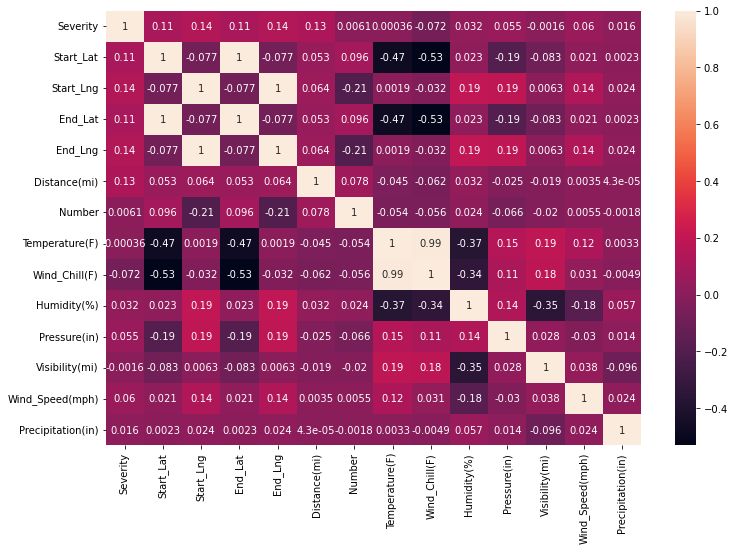

In [4]:
correlation_matrix = accident.corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [5]:
accident = accident.iloc[:73969 ,:]
accident.to_csv("accident.csv")

In [6]:
new_accident = pd.read_csv("accident.csv")
new_accident.shape
new_accident.size

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


3550512

In [7]:
new_accident

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-2716600,3.0,2/8/2016 0:37,2/8/2016 6:37,40.108910,-83.092860,40.112060,-83.031870,3.230,...,False,False,False,False,False,False,Night,Night,Night,Night
1,1,A-2716601,2.0,2/8/2016 5:56,2/8/2016 11:56,39.865420,-84.062800,39.865010,-84.048730,0.747,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,A-2716602,2.0,2/8/2016 6:15,2/8/2016 12:15,39.102660,-84.524680,39.102090,-84.523960,0.055,...,False,False,False,False,False,False,Night,Night,Night,Day
3,3,A-2716603,2.0,2/8/2016 6:15,2/8/2016 12:15,39.101480,-84.523410,39.098410,-84.522410,0.219,...,False,False,False,False,False,False,Night,Night,Night,Day
4,4,A-2716604,2.0,2/8/2016 6:51,2/8/2016 12:51,41.062130,-81.537840,41.062170,-81.535470,0.123,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73964,73964,A-2790564,2.0,8/5/2016 7:16,8/5/2016 13:16,37.668270,-77.643930,37.660422,-77.622289,1.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73965,73965,A-2790565,2.0,8/5/2016 7:20,8/5/2016 13:20,42.340610,-79.580710,42.265230,-79.739070,9.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73966,73966,A-2790566,2.0,8/5/2016 7:27,8/5/2016 13:27,39.227755,-75.572938,39.237070,-75.580313,0.755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73967,73967,A-2790567,2.0,8/5/2016 7:34,8/5/2016 13:34,42.698140,-71.141770,42.711320,-71.137270,0.939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

accident=pd.read_csv('accident.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
accident['ID']= label_encoder.fit_transform(accident['ID'])
accident['Street']= label_encoder.fit_transform(accident['Street'])
accident['Side']= label_encoder.fit_transform(accident['Side'])
accident['City']= label_encoder.fit_transform(accident['City'])

accident['County']= label_encoder.fit_transform(accident['County'])
accident['State']= label_encoder.fit_transform(accident['State'])
accident['Country']= label_encoder.fit_transform(accident['Country'])
accident['Timezone']= label_encoder.fit_transform(accident['Timezone'])
accident['Airport_Code']= label_encoder.fit_transform(accident['Airport_Code'])
accident['Wind_Direction']= label_encoder.fit_transform(accident['Wind_Direction'])
accident['Weather_Condition']= label_encoder.fit_transform(accident['Weather_Condition'])
accident['Amenity']= label_encoder.fit_transform(accident['Amenity'])
accident['Bump']= label_encoder.fit_transform(accident['Bump'])
accident['Crossing']= label_encoder.fit_transform(accident['Crossing'])
accident['Give_Way']= label_encoder.fit_transform(accident['Give_Way'])
accident['Junction']= label_encoder.fit_transform(accident['Crossing'])
accident['Give_Way']= label_encoder.fit_transform(accident['Junction'])
accident['No_Exit']= label_encoder.fit_transform(accident['No_Exit'])
accident['Railway']= label_encoder.fit_transform(accident['Railway'])
#final_data['Railway']= label_encoder.fit_transform(final_data['Railway'])
accident['Roundabout']= label_encoder.fit_transform(accident['Roundabout'])
accident['Station']= label_encoder.fit_transform(accident['Station'])
accident['Stop']= label_encoder.fit_transform(accident['Stop'])
accident['Traffic_Calming']= label_encoder.fit_transform(accident['Traffic_Calming'])
accident['Traffic_Signal']= label_encoder.fit_transform(accident['Traffic_Signal'])
accident['Turning_Loop']= label_encoder.fit_transform(accident['Turning_Loop'])
accident['Sunrise_Sunset']= label_encoder.fit_transform(accident['Sunrise_Sunset'])
accident['Civil_Twilight']= label_encoder.fit_transform(accident['Civil_Twilight'])
accident['Nautical_Twilight']= label_encoder.fit_transform(accident['Nautical_Twilight'])
accident['Astronomical_Twilight']= label_encoder.fit_transform(accident['Astronomical_Twilight'])

In [11]:
features = accident.drop(['Description','ID','Start_Time','End_Time','Weather_Timestamp','Airport_Code','Number','Zipcode'],axis = 1)
print(features)
print(features.shape)
features.head

       Unnamed: 0  Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  \
0               0       3.0  40.108910 -83.092860  40.112060 -83.031870   
1               1       2.0  39.865420 -84.062800  39.865010 -84.048730   
2               2       2.0  39.102660 -84.524680  39.102090 -84.523960   
3               3       2.0  39.101480 -84.523410  39.098410 -84.522410   
4               4       2.0  41.062130 -81.537840  41.062170 -81.535470   
...           ...       ...        ...        ...        ...        ...   
73964       73964       2.0  37.668270 -77.643930  37.660422 -77.622289   
73965       73965       2.0  42.340610 -79.580710  42.265230 -79.739070   
73966       73966       2.0  39.227755 -75.572938  39.237070 -75.580313   
73967       73967       2.0  42.698140 -71.141770  42.711320 -71.137270   
73968       73968       2.0  42.352280 -71.058120  42.350500 -71.059530   

       Distance(mi)           Street Side           City  ... Roundabout  \
0             3.230    

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,3.0,40.108910,-83.092860,40.112060,-83.031870,3.23,Outerbelt E,R,Dublin,...,False,False,False,False,False,False,Night,Night,Night,Night
5,5,3.0,39.172393,-84.492792,39.170476,-84.501798,0.50,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
print(kmeans)
kmeans.fit(features)
labels = kmeans.fit_predict(features)
labels

KMeans(n_clusters=2)


ValueError: could not convert string to float: 'Outerbelt E'

In [ ]:
import keras
from keras import layers
import tensorflow
from keras.utils import np_utils
from keras import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Activation,Conv1D,SpatialDropout1D
from tensorflow.keras.layers import Dense, Embedding,MaxPooling1D
from tensorflow.keras.layers import Dropout,Bidirectional,BatchNormalization

In [ ]:
accident.head()
def systematic_sampling(accident, step):
 
    indexes = np.arange(0, len(accident), step=step)
    systematic_sample = accident.iloc[indexes]
    return systematic_sample
 
 
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(accident, 3)
 
# View sampled data frame
display(systematic_sample)

In [ ]:
features = accident.drop(['Description','ID','Start_Time','End_Time','Weather_Timestamp','Airport_Code','Number','Zipcode'],axis = 1)
print(features)
print(features.shape)
features.head

In [ ]:
import keras
from keras import layers
import tensorflow
from keras.utils import np_utils
from keras import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Activation,Conv1D,SpatialDropout1D
from tensorflow.keras.layers import Dense, Embedding,MaxPooling1D
from tensorflow.keras.layers import Dropout,Bidirectional,BatchNormalization

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(features)
labels = kmeans.fit_predict(features)
labels

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.20, random_state=0)
X_train.shape

In [ ]:
import keras
from keras import layers
import tensorflow
from keras.utils import np_utils
from keras import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Activation,Conv1D,SpatialDropout1D
from tensorflow.keras.layers import Dense, Embedding,MaxPooling1D
from tensorflow.keras.layers import Dropout,Bidirectional,BatchNormalization

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#X = data.iloc[:,:13].values
#Y = data['City'].values
X_train, X_test, Y_train, Y_test = train_test_split(features,labels, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#svcclassifier = SVC(kernel = 'poly', random_state = 50)
#svcclassifier.fit(X_train, Y_train)
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, Y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [6]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 50)
svcclassifier.fit(X_train, Y_train)
y_pred = svcclassifier.predict(X_test)
P = accuracy_score(y_pred,Y_test)
print("Accuracy score for SVM:",P)

NameError: name 'X_train' is not defined

In [7]:
#x_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
#x_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
#function name
#Needed Deep learning library files
import numpy 
from numpy import array

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train = array(X_train)
print(X_train.shape)
X_train_3D = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train_3D.shape)
X_test = array(X_test)
print(X_test.shape)
X_test_3D = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test_3D.shape)

#numpy.reshape(X_train, array.shape + (1,))

NameError: name 'X_train' is not defined

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import neighbors, datasets
#iris = load_iris('dataset/US_Accidents_Dec20_updated.csv')
#print(iris)
iris=accident
iris=pd.read_csv('dataset/US_Accidents_Dec20_updated.csv')# Printing test_list
print ("The list is : " + str(iris))
  
# Finding length of list 
# using loop
# Initializing counter
counter = 0
for i in zip (iris):
      
    # incrementing counter
    counter = counter + 1
  
# Printing length of list 
print ("Length of list using naive method is : " + str(counter))
print(iris.shape)
#print(iris.data.shape)

#n_samples, n_features = iris.DataFrame.shape
print(n_samples)

print(n_features)



NameError: name 'accident' is not defined

In [ ]:
%matplotlib inline
#Deep learning model with Grey Wolf Optimizer (GWO) (Novelty work)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.utils import plot_model
tf.keras.backend.clear_session()
import numpy as np
class LSTM_Network:
    def __init__(self):
        # Neural network
        model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                             strides=1, padding="causal",
                             activation="relu",
                             input_shape=[None, 1]),  # None = Model can take sequences of any length
        tf.keras.layers.LSTM(60, activation="tanh", return_sequences=True),
        tf.keras.layers.LSTM(60, activation="tanh", return_sequences=False),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x * 100)  # LSTM's tanh activation returns between -1 and 1. Scaling output to same range of values helps learning.
        ])

        # Note: to turn this into a classification task, just add a sigmoid function after the last Dense layer and remove Lambda layer.

        #optimizer = tf.keras.optimizers.Adam(lr=1e-5, momentum=0.9)
        model.compile(loss=tf.keras.losses.MeanSquaredError(), # Huber is less sensitive to outliers
                              optimizer="adam",
                              metrics=["accuracy"])
        model.summary()
        self.model = model
        self.acc_history = []
    def acc_history(self):
        return self.acc_history
    def train_neural_network(self):
        self.model.fit(X_train_3D,Y_train, batch_size = 32, epochs =15, verbose = 1,shuffle = True,validation_split=0.20) #, 
    def test_neural_network(self):
        loss, acc = self.model.evaluate(X_test_3D,Y_test)
        pre=self.model.predict(X_test_3D)
        from sklearn.metrics import accuracy_score
        
        print(' Accuracy Value:',acc)
        
        #metric = "mae"
        #plt.figure()
       # plt.plot(self.model.history.history['mean_absolute_error'])
        #plt.plot(self.model.history.history["val_mean_absolute_error"])
        #plt.title("model " + metric)
        #plt.ylabel(metric, fontsize="large")
        #plt.xlabel("epoch", fontsize="large")
        #plt.legend(["train", "val"], loc="best")
        #plt.show()
        #plt.close()
        
        #plt.figure()
        #plt.plot(self.model.history.history['loss'])
        #plt.plot(self.model.history.history["val_loss"])
        #plt.title("model " + metric)
        #plt.ylabel("loss", fontsize="large")
        #plt.xlabel("epoch", fontsize="large")
        #plt.legend(["train", "val"], loc="best")
        #plt.show()
        #plt.close()
        
       # plt.figure(figsize=(25,10))
        #plt.plot(Y_test.values[::24], color='blue', label='Original Usage')
        #plt.plot(pre[:,0][::24] , color='red', label='Predicted Usage')
        #plt.title('Energy Usage Prediction')
       # plt.xlabel('Date')
        #plt.ylabel('kW')
        #plt.legend()
        #plt.show()
        
       # self.model.save('LSTMModel1.h5')
        return acc
    def layer_weight(self,i):
        return self.model.layers[i].get_weights()
    def new_layer_weight(self,i,weight):
        self.model.layers[i].set_weights(weight)
    def load_layer_weights(self,weights):
        self.model.set_weights(weights) 
    def give_weights(self):
        return self.model.get_weights()
    def weight_len(self):
        i = 0 
        for j in self.model.layers:
            i+=1
        return i 
    def architecture(self):
        self.model.summary()

In [ ]:
class GWO:
    def __init__(self, grey_wolf_size, rate, generations = 50):
        self.grey_wolf_size = grey_wolf_size
        self.rate = rate
        self.generations = generations
        self.population = None
        self.wolf_population_weights = []
        self.acces = []
        self.norm_acces = []
    def generate_wolf(self):
        self.population = [LSTM_Network() for i in range(self.grey_wolf_size)]
    def train_generation(self):
        for member in self.population:
                member.train_neural_network()  
    def predict(self):
        for member in self.population:
                acc = member.test_neural_network()
                self.acc.append(acc)
    def normalize(self):
        sum_ = sum(self.acc)
        self.norm_acc = [i/sum_ for i in self.acc] 
        print("Normalization sum: ",sum(self.norm_acc))
    def show_weights(self):
        for i in parent_weights:
            print(i)
    def clear_losses(self):
        self.norm_acc = []
        self.acc = []
    def fitness_func(self):
        output = numpy.sum(solution*function_inputs)
        fitness = 1.0 / numpy.abs(output - desired_output)
        return fitness
    def find(self):
        for member in self.population:
            for i in range(member.weight_len()):
                if np.random.random() < self.rate:
                    old_weight = member.layer_weight(i)
                    new_weight = [np.random.uniform(low=-1, high=1, size=old_weight[i].shape) for i in range(len(old_weight))]
                    member.new_layer_weight(i, new_weight)
    def reproduction_new(self):
        population_idx = [i for i in range(len(self.population))]
        for i in range(len(self.population)):
            if sum(self.norm_acc) != 0:
                wolf1 = np.random.choice(population_idx, p = self.norm_acc)
                wolf2 = np.random.choice(population_idx, p = self.norm_acc)
            else:
                wolf1= np.random.choice(population_idx)
                wolf2 = np.random.choice(population_idx)
            wolf1_weights = self.population[wolf1].give_weights()
            wolf2_weights = self.population[wolf2].give_weights()
            mid_point = np.random.choice([i for i in range(len(wolf1_weights))])
            self.wolf_population_weights.append(wolf1_weights[:mid_point] + wolf2_weights[mid_point:])
        for i in range(len(self.population)):
            for j in range(len(self.wolf_population_weights)):
                self.population[i].load_layer_weights(self.wolf_population_weights[j])
    def run_evolution(self):
        for episode in range(self.generations):
            self.clear_losses()
            self.train_generation()
            self.predict()
            if episode != self.generations -1:
                self.normalize()
                self.reproduction_new()
                self.find()
            else:
                pass
        for a in range(self.generations):
            for member in self.population:
                plt.plot(member.acc_history)
        #plt.xlabel("Generations")
       # plt.ylabel("Accuracy")
        #plt.show()

In [9]:
gwo= GWO(grey_wolf_size = 1,rate = 0.05, generations = 1)
gwo.generate_wolf()
gwo.run_evolution()

NameError: name 'GWO' is not defined

16


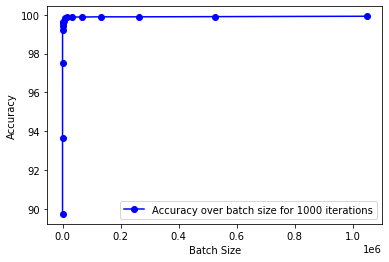

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
batch_size=[16,32,64,128,512,1024,2048,4096,8192,16384,32768,65536,131072,262144,524288,1048576]
accuracy=[89.73,93.64,97.52,99.44,99.63,99.71,99.57,99.82,99.24,99.90,99.87,99.91,99.93,99.89,99.89,99.90]
accuracy.sort()
print(len(accuracy))
plt.plot(batch_size,accuracy,'b-o',label='Accuracy over batch size for 1000 iterations');
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
accident=pd.read_csv('US_Accidents_Dec20_updated.csv')
accident.head()
print(accident.columns)
data= pd.DataFrame(accident)
print(data)
print(data.head)
print(accident.shape)

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3,9,11,12,13,14,15,16,17,18,19,20,26,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
                ID  Severity     Start_Time        End_Time  Start_Lat  \
0        A-2716600       3.0  2/8/2016 0:37   2/8/2016 6:37   40.10891   
1        A-2716601       2.0  2/8/2016 5:56  2/8/2016 11:56   39.86542   
2        A-2716602       2.0

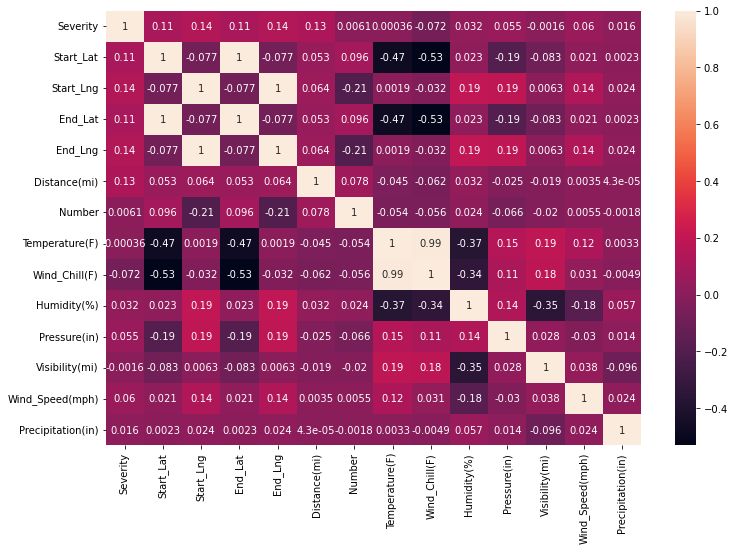

In [33]:
correlation_matrix = accident.corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [34]:
accident.dropna(inplace=True)
accident.shape
accident.size

0

In [35]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
accident['ID']= label_encoder.fit_transform(accident['ID'])
accident['Street']= label_encoder.fit_transform(accident['Street'])
accident['Side']= label_encoder.fit_transform(accident['Side'])
accident['City']= label_encoder.fit_transform(accident['City'])

accident['County']= label_encoder.fit_transform(accident['County'])
accident['State']= label_encoder.fit_transform(accident['State'])
accident['Country']= label_encoder.fit_transform(accident['Country'])
accident['Timezone']= label_encoder.fit_transform(accident['Timezone'])
accident['Airport_Code']= label_encoder.fit_transform(accident['Airport_Code'])
accident['Wind_Direction']= label_encoder.fit_transform(accident['Wind_Direction'])
accident['Weather_Condition']= label_encoder.fit_transform(accident['Weather_Condition'])
accident['Amenity']= label_encoder.fit_transform(accident['Amenity'])
accident['Bump']= label_encoder.fit_transform(accident['Bump'])
accident['Crossing']= label_encoder.fit_transform(accident['Crossing'])
accident['Give_Way']= label_encoder.fit_transform(accident['Give_Way'])
accident['Junction']= label_encoder.fit_transform(accident['Crossing'])
accident['Give_Way']= label_encoder.fit_transform(accident['Junction'])
accident['No_Exit']= label_encoder.fit_transform(accident['No_Exit'])
accident['Railway']= label_encoder.fit_transform(accident['Railway'])
#final_data['Railway']= label_encoder.fit_transform(final_data['Railway'])
accident['Roundabout']= label_encoder.fit_transform(accident['Roundabout'])
accident['Station']= label_encoder.fit_transform(accident['Station'])
accident['Stop']= label_encoder.fit_transform(accident['Stop'])
accident['Traffic_Calming']= label_encoder.fit_transform(accident['Traffic_Calming'])
accident['Traffic_Signal']= label_encoder.fit_transform(accident['Traffic_Signal'])
accident['Turning_Loop']= label_encoder.fit_transform(accident['Turning_Loop'])
accident['Sunrise_Sunset']= label_encoder.fit_transform(accident['Sunrise_Sunset'])
accident['Civil_Twilight']= label_encoder.fit_transform(accident['Civil_Twilight'])
accident['Nautical_Twilight']= label_encoder.fit_transform(accident['Nautical_Twilight'])
accident['Astronomical_Twilight']= label_encoder.fit_transform(accident['Astronomical_Twilight'])

In [36]:
accident.shape

(0, 47)

In [37]:
final_data = accident.join(new_accident, lsuffix='_caller', rsuffix='_other')
print(final_data.shape)
final_data

(0, 95)


,ID_caller,Severity_caller,Start_Time_caller,End_Time_caller,Start_Lat_caller,Start_Lng_caller,End_Lat_caller,End_Lng_caller,Distance(mi)_caller,Description_caller,...,Roundabout_other,Station_other,Stop_other,Traffic_Calming_other,Traffic_Signal_other,Turning_Loop_other,Sunrise_Sunset_other,Civil_Twilight_other,Nautical_Twilight_other,Astronomical_Twilight_other


In [45]:
final_data = final_data.iloc[:50000:]
final_data

,Unnamed: 0,ID_caller,Severity_caller,Start_Time_caller,End_Time_caller,Start_Lat_caller,Start_Lng_caller,End_Lat_caller,End_Lng_caller,Distance(mi)_caller,...,Roundabout_other,Station_other,Stop_other,Traffic_Calming_other,Traffic_Signal_other,Turning_Loop_other,Sunrise_Sunset_other,Civil_Twilight_other,Nautical_Twilight_other,Astronomical_Twilight_other


In [47]:
from sklearn.cluster import KMeans
from keras import utils as np_utils
kmeans = KMeans(3)
kmeans.fit(final_data)
labels = kmeans.fit_predict(final_data)
labels

ValueError: Found array with 0 sample(s) (shape=(0, 96)) while a minimum of 1 is required.

In [ ]:
import keras
from keras import layers
import tensorflow
from keras import Sequential
from keras.layers import LSTM,Flatten,Activation,Conv1D,SpatialDropout1D
from keras.layers import Dense, Embedding,MaxPooling1D
from keras.layers import Dropout,Bidirectional,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras import utils as np_utils
from tensorflow import keras
from tensorflow.python import keras

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.20, random_state=0)
X_train.shape

In [190]:
x_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [180]:
y_train =to_categorical(Y_train,num_classes=None, dtype='float32')
y_test =to_categorical(Y_test,num_classes=None, dtype='float32')

In [183]:
traffic = Sequential()

traffic.add(Conv1D(128,  (11), (4), padding='same',input_shape=(74,1)))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(MaxPooling1D((2), (2), padding='same'))

traffic.add(Conv1D(256, (3), (1), padding='same'))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))

traffic.add(Conv1D(512, (3), (1), padding='same'))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(MaxPooling1D((2), (2), padding='same'))

traffic.add(Flatten())
traffic.add(Dense(4096))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(Dropout(0.4))

traffic.add(Dense(4096))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(Dropout(0.4))

traffic.add(Dense(1000))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(Dropout(0.4))

traffic.add(Dense(3))
traffic.add(BatchNormalization())
traffic.add(Activation('softmax'))

traffic.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 19, 128)           1536      
                                                                 
 batch_normalization_28 (Bat  (None, 19, 128)          512       
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 19, 128)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 10, 128)          0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 10, 256)           98560     
                                                                 
 batch_normalization_29 (Bat  (None, 10, 256)         

In [182]:
traffic.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = traffic.fit(x_train,y_train,batch_size=500,shuffle = False,epochs=5,verbose=1,
                    validation_data=(x_train,y_train))

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Admin\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 74, 1), found shape=(None, 75, 1)


In [ ]:
LSTM ALGORITHM USING 

In [26]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:

# fix random seed for reproducibility
numpy.random.seed(7)

In [28]:

# load the dataset
dataframe = pandas.read_csv('dataset/US_Accidents_Dec20_updated.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [29]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

702545 346030


In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
702543/702543 - 2089s - loss: 0.0239 - 2089s/epoch - 3ms/step
Epoch 2/100


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()